In [2]:
from keras.datasets import reuters

(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words = 10000)

In [3]:
print("train_data = ", len(train_data))
print("test_data = ", len(test_data))

train_data =  8982
test_data =  2246


In [4]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
train_labels[10]

3

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in  enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [12]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels_1 = to_categorical(train_labels)
one_hot_test_labels_1 = to_categorical(test_labels)

In [14]:
print(one_hot_train_labels[0])
print(one_hot_train_labels_1[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.summary()

W0811 14:14:21.901777 139762051147584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/Keras-2.2.4-py3.6.egg/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0811 14:14:21.922808 139762051147584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/Keras-2.2.4-py3.6.egg/keras/backend/tensorflow_backend.py:529: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0811 14:14:21.925667 139762051147584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/Keras-2.2.4-py3.6.egg/keras/backend/tensorflow_backend.py:4420: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [16]:
from keras.optimizers import RMSprop
from keras.losses import categorical_crossentropy
#from keras import metrics

model.compile(optimizer = RMSprop(lr = 0.001),
              loss = categorical_crossentropy,
              metrics = ['acc'])

W0811 14:15:36.599814 139762051147584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/Keras-2.2.4-py3.6.egg/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0811 14:15:36.606040 139762051147584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/Keras-2.2.4-py3.6.egg/keras/backend/tensorflow_backend.py:3564: The name tf.log is deprecated. Please use tf.math.log instead.



In [17]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [22]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data=(x_val, y_val))

W0811 14:19:45.975873 139762051147584 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0811 14:19:46.026372 139762051147584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/Keras-2.2.4-py3.6.egg/keras/backend/tensorflow_backend.py:1021: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 478us/step - loss: 2.8776 - acc: 0.5091 - val_loss: 1.8836 - val_acc: 0.6260
Epoch 2/20
7982/7982 [==============================] - 0s 56us/step - loss: 1.5127 - acc: 0.6947 - val_loss: 1.3513 - val_acc: 0.7090
Epoch 3/20
7982/7982 [==============================] - 0s 44us/step - loss: 1.0903 - acc: 0.7702 - val_loss: 1.1736 - val_acc: 0.7510
Epoch 4/20
7982/7982 [==============================] - 0s 43us/step - loss: 0.8519 - acc: 0.8203 - val_loss: 1.0706 - val_acc: 0.7810
Epoch 5/20
7982/7982 [==============================] - 0s 43us/step - loss: 0.6746 - acc: 0.8611 - val_loss: 1.0057 - val_acc: 0.7840
Epoch 6/20
7982/7982 [==============================] - 0s 45us/step - loss: 0.5382 - acc: 0.8921 - val_loss: 0.9794 - val_acc: 0.7960
Epoch 7/20
7982/7982 [==============================] - 0s 41us/step - loss: 0.4268 - acc: 0.9158 - val_loss: 0.9261 - val_acc: 0.8100
Epoch 

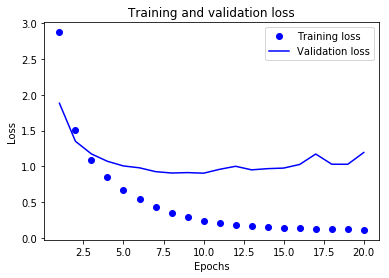

In [24]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+ 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

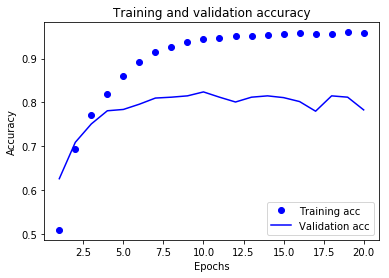

In [25]:
plt.clf() 

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()